# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import string

from scipy.stats import linregress

# Import weather key
from config import wkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_city_file = "output_data/cities.csv"

output_weather_file = "output_data/city_weather.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [39]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations, use size>=500
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(string.capwords(city))

# Print the city count to confirm sufficient count
len(cities)

1500

In [40]:
#practice creating a dictionary and saving dictionary to csv file
city_dict = {
    "city": cities,
    "lat": lats,
    "long": lngs,
}
city_data = pd.DataFrame(city_dict)


export_csv = city_data.to_csv (output_city_file, index = None, header=True)

city_data.head()


,city,lat,long
0,Tiksi,75.476806,122.065856
1,Vaini,-28.159105,-176.326759
2,Erdenet,48.981445,104.347506
3,Ushuaia,-73.311527,-50.763631
4,Mataura,-79.144810,-143.347044


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [41]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={wkey}&units={units}&q="

# set up lists to hold reponse info
latitude = []
longitude = []
temp = []
maxTemp = []
humidity = []
cloud = []
wind = []
country = []
mycity = []
myCount = 0

myLog = open('output_data/city_process_log.txt','w')

# Loop through the list of cities and perform a request for data on each
for city in cities:
    if city in mycity:
        pass
    else:        
        try:    

            response = requests.get(query_url + city).json()
            myCount = myCount+1  

            #wait 60 seconds after 50 reads, since only allowed 60 reads per minute        
            if myCount == 50:
                print("fifty cities read, take a break")
                time.sleep(60)
                myCount = 0

            #store city info
            longitude.append(response['coord']['lon'])
            latitude.append(response['coord']['lat'])
            temp.append(response['main']['temp'])
            maxTemp.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            wind.append(response['wind']['speed'])
            cloud.append(response['clouds']['all'])
            country.append(response['sys']['country'])
            mycity.append(city)
            

            # print city being processed 
            myLog.write("city #" + str(myCount) + " is " + str(city) + " in " + str(response['sys']['country'])+ "\n")

        #filter out errors, caused by city not foud
        except:
            pass

myLog.close()

fifty cities read, take a break
fifty cities read, take a break
fifty cities read, take a break
fifty cities read, take a break
fifty cities read, take a break
fifty cities read, take a break
fifty cities read, take a break
fifty cities read, take a break
fifty cities read, take a break
fifty cities read, take a break
fifty cities read, take a break
fifty cities read, take a break
fifty cities read, take a break


In [43]:
len(mycity)

552

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [44]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": mycity,
    "country":country,
    "lat": latitude,
    "long": longitude,
    "temp": temp,
    "max_temp": maxTemp,
    "humidity": humidity,
    "wind speed": wind,
    "clouds": cloud
}
weather_data = pd.DataFrame(weather_dict)

# print result to file
export_csv2 = weather_data.to_csv (output_weather_file, index = None, header=True)


In [45]:
weather_data.head()

,city,country,lat,long,temp,max_temp,humidity,wind speed,clouds
0,Tiksi,RU,71.64,128.87,25.62,25.62,83,21.00,96
1,Vaini,IN,15.34,74.49,83.46,84.20,65,4.70,40
2,Erdenet,MN,49.03,104.04,56.33,56.33,34,15.73,0
3,Ushuaia,AR,-54.81,-68.31,32.00,32.00,93,38.03,90
4,Mataura,NZ,-46.19,168.86,51.01,51.01,94,1.99,100


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

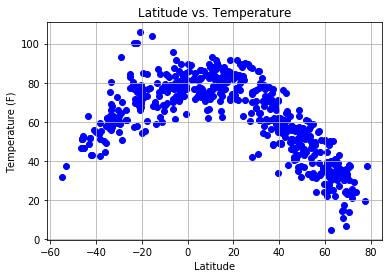

In [46]:
#scatter plot
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.title("Latitude vs. Temperature")

plt.scatter(weather_data["lat"],weather_data["temp"],color="blue",marker="o")
plt.grid()

plt.savefig('figure_1_Latitude_vs_Temperature.pdf', dpi=300)  
plt.show()

Latitude vs Temperature figure demonstrates that the temperature 
is warmest near the equator (0 degrees latitude). As you go further from the equator in either direction the temperature tends to decrease.

#### Latitude vs. Humidity Plot

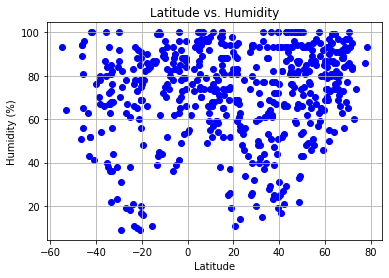

In [47]:
#scatter plot
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("Latitude vs. Humidity")

plt.scatter(weather_data["lat"],weather_data["humidity"],color="blue",marker="o")
plt.grid()

plt.savefig('figure_2_Latitude_vs_Humidity.pdf', dpi=300)  
plt.show()

Latitude vs Humidity figure demonstrates that the humidity 
is consistently high at locations near the equator. However for locations further from the equator
the humidity is inconsistent, varies greatly and ranges from LO to HIGH at location not at the equator.

#### Latitude vs. Cloudiness Plot

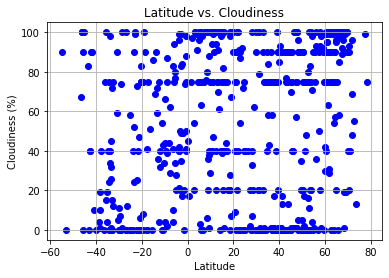

In [48]:
#scatter plot
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("Latitude vs. Cloudiness")

plt.scatter(weather_data["lat"],weather_data["clouds"],color="blue",marker="o")
plt.grid()

plt.savefig('figure_3_Latitude_vs_Cloudiness.pdf', dpi=300)  
plt.show()

Latitude vs Cloudiness figure demonstrates no correlation between latitude and cloudiness

#### Latitude vs. Wind Speed Plot

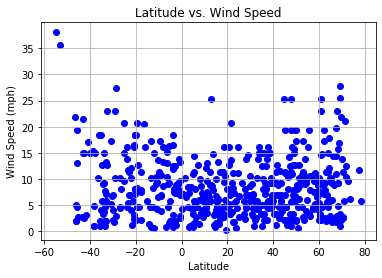

In [49]:
#scatter plot
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title("Latitude vs. Wind Speed")

plt.scatter(weather_data["lat"],weather_data["wind speed"],color="blue",marker="o")
plt.grid()

plt.savefig('figure_4_Latitude_vs_WindSpeed.pdf', dpi=300)  
plt.show()



Latitude vs Wind Speed demonstrates no correlation between wind speed and latitude

## Linear Regression

In [50]:
# OPTIONAL: Create a function to create Linear Regression plots


In [51]:
# Create Northern and Southern Hemisphere DataFrames
northHemisphere_dict = {
    "city": weather_data.loc[weather_data["lat"]>0]["city"],
    "lat": weather_data.loc[weather_data["lat"]>0]["lat"],
    "max_temp": weather_data.loc[weather_data["lat"]>0]["max_temp"],
    "humidity": weather_data.loc[weather_data["lat"]>0]["humidity"],
    "wind speed": weather_data.loc[weather_data["lat"]>0]["wind speed"],
    "clouds": weather_data.loc[weather_data["lat"]>0]["clouds"]
}
northHemisphere_data = pd.DataFrame(northHemisphere_dict)

In [52]:
southHemisphere_dict = {
    "city": weather_data.loc[weather_data["lat"]<0]["city"],
    "lat": weather_data.loc[weather_data["lat"]<0]["lat"],
    "max_temp": weather_data.loc[weather_data["lat"]<0]["max_temp"],
    "humidity": weather_data.loc[weather_data["lat"]<0]["humidity"],
    "wind speed": weather_data.loc[weather_data["lat"]<0]["wind speed"],
    "clouds": weather_data.loc[weather_data["lat"]<0]["clouds"]
}
southHemisphere_data = pd.DataFrame(southHemisphere_dict)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

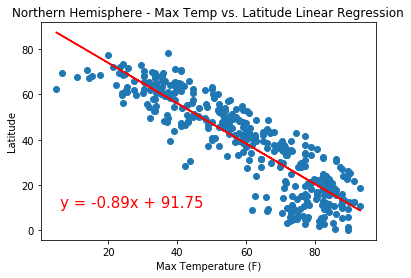

In [53]:
x_values = northHemisphere_data["max_temp"]
y_values = northHemisphere_data["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Max Temperature (F)')
plt.ylabel('Latitude')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig('figure_5_NorthernHemisphere_Temp_Latitude.pdf', dpi=300)  
plt.show()

This figure indicates there is an inverse relationship between latitude and max temperatures.
Basically this means that in the northern hemisphere, the further from the equator the colder it gets.  The closer to the equator the warmer it gets.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

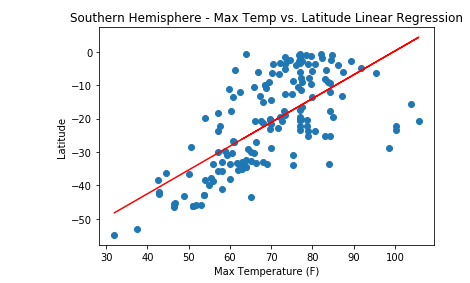

In [54]:
x_values = southHemisphere_data["max_temp"]
y_values = southHemisphere_data["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Max Temperature (F)')
plt.ylabel('Latitude')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig('figure_6_SouthernHemisphere_Temp_Latitude.pdf', dpi=300)  
plt.show()

This figure indicates there is an positive relationship between latitude and max temperatures in the southern hemisphere. Basically this means that in the southern hemisphere, the closer you get to the equator the warmer it gets. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

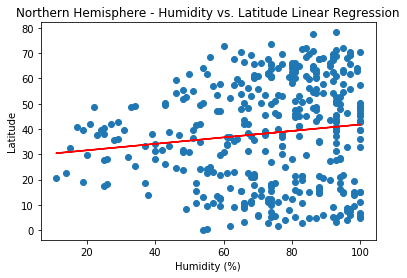

In [55]:
x_values = northHemisphere_data["humidity"]
y_values = northHemisphere_data["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.savefig('figure_7_NorthernHemisphere_Humidity_Latitude.pdf', dpi=300)  
plt.show()

This figure suggest that in the Northern hemisphere there is no correlation 
between the humidity and the latitude

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

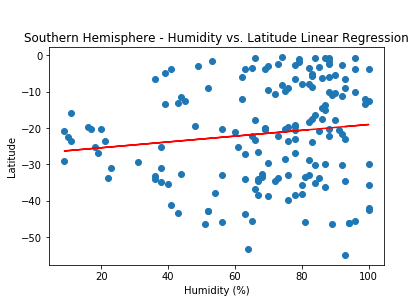

In [56]:
x_values = southHemisphere_data["humidity"]
y_values = southHemisphere_data["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.savefig('figure_8_SouthernHemisphere_Humidity_Latitude.pdf', dpi=300)  
plt.show()

This figure suggest that in the southern hemisphere there is no correlation between the humidity and the latitude

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

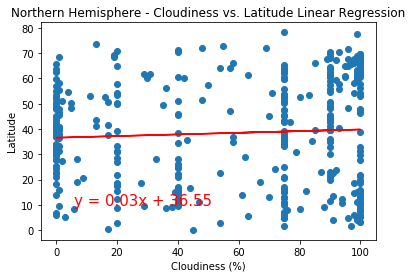

In [57]:
x_values = northHemisphere_data["clouds"]
y_values = northHemisphere_data["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.savefig('figure_9_NorthernHemisphere_Cloud_Latitude.pdf', dpi=300)  
plt.show()

This figure suggest that in the northern hemisphere there is no correlation between the cloudiness and the latitude

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

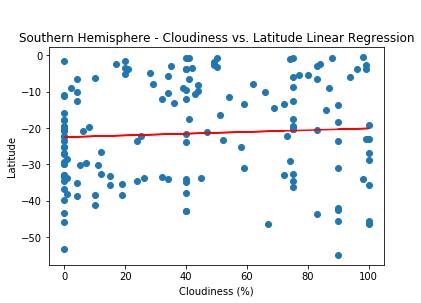

In [58]:
x_values = southHemisphere_data["clouds"]
y_values = southHemisphere_data["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.savefig('figure_10_SouthernHemisphere_Cloud_Latitude.pdf', dpi=300)  
plt.show()

This figure suggest that in the southern hemisphere there is no correlation between the cloudiness and the latitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

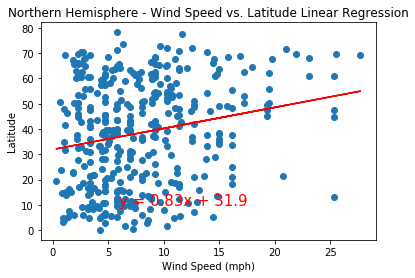

In [59]:
x_values = northHemisphere_data["wind speed"]
y_values = northHemisphere_data["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.savefig('figure_11_NorthernHemisphere_Wind_Latitude.pdf', dpi=300)  
plt.show()

This figure suggest that in the northern hemisphere there is no correlation between wind speed and the latitude

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

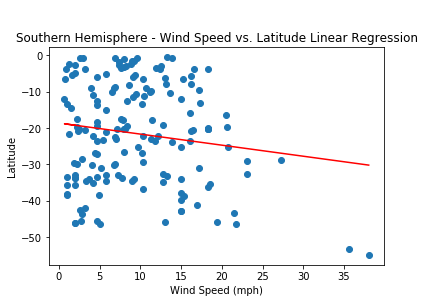

In [60]:
x_values = southHemisphere_data["wind speed"]
y_values = southHemisphere_data["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.savefig('figure_12_SouthernHemisphere_Wind_Latitude.pdf', dpi=300)  
plt.show()

This figure suggest that in the southern hemisphere there is no correlation between wind speed and the latitude